Statistical summary BEFORE cleaning:
                           timestamp  hydrogen_concentration  temperature  \
count                           1000             1000.000000  1000.000000   
mean   2024-01-01 08:19:29.999999744              501.120130    30.087546   
min              2024-01-01 00:00:00                0.000000    18.033955   
25%              2024-01-01 04:09:45              256.490115    24.998866   
50%              2024-01-01 08:19:30              493.277927    30.274810   
75%              2024-01-01 12:29:15              749.568213    35.079975   
max              2024-01-01 16:39:00             1000.000000    42.467119   
std                              NaN              292.681404     5.886790   

          humidity  
count  1000.000000  
mean     49.278209  
min      25.852629  
25%      39.901106  
50%      49.195309  
75%      58.552945  
max      72.448547  
std      11.503251  

Statistical summary AFTER cleaning:
                           timestamp  hydro

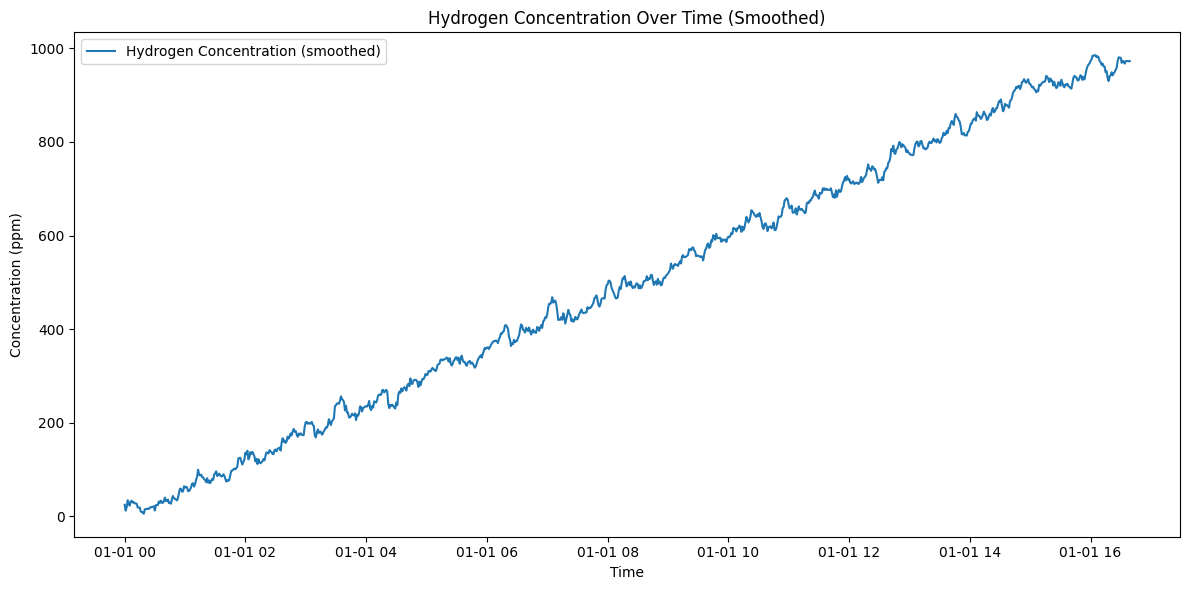


Insights:
- Hydrogen concentration and sensor response are strongly correlated (expected).
- Temperature and humidity have low correlation with hydrogen concentration (check correlation matrix).
- Moving average smoothing helps visualize trends and reduce noise.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Generate synthetic sensor data
np.random.seed(42)

timestamps = pd.date_range(start='2024-01-01', periods=1000, freq='min')

true_concentration = np.linspace(0, 1000, 1000)
noise = np.random.normal(0, 50, 1000)
hydrogen_concentration = np.clip(true_concentration + noise, 0, 1000)

temperature = 20 + 20 * np.random.rand(1000) + np.random.normal(0, 1, 1000)
humidity = 30 + 40 * np.random.rand(1000) + np.random.normal(0, 2, 1000)

df = pd.DataFrame({
    'timestamp': timestamps,
    'hydrogen_concentration': hydrogen_concentration,
    'temperature': temperature,
    'humidity': humidity
})

# Statistical summary before cleaning
print("Statistical summary BEFORE cleaning:")
print(df.describe())

# Data cleaning

# Drop NAs (precautionary)
df_clean = df.dropna()

# Function to remove outliers beyond 3 std dev for a column
def remove_outliers(df, col):
    mean = df[col].mean()
    std = df[col].std()
    filtered_df = df[(df[col] >= mean - 3*std) & (df[col] <= mean + 3*std)]
    return filtered_df

# Remove outliers for each variable
for col in ['hydrogen_concentration', 'temperature', 'humidity']:
    df_clean = remove_outliers(df_clean, col)

# Statistical summary after cleaning
print("\nStatistical summary AFTER cleaning:")
print(df_clean.describe())

# Data smoothing (moving average with window=10)
df_clean['hydrogen_conc_smooth'] = df_clean['hydrogen_concentration'].rolling(window=10, min_periods=1).mean()
df_clean['temperature_smooth'] = df_clean['temperature'].rolling(window=10, min_periods=1).mean()
df_clean['humidity_smooth'] = df_clean['humidity'].rolling(window=10, min_periods=1).mean()

# Correlation analysis
corr = df_clean[['hydrogen_concentration', 'temperature', 'humidity']].corr()
print("\nCorrelation matrix:")
print(corr)

# Step 7: Visualization

# 7a: Hydrogen concentration over time (smoothed)
plt.figure(figsize=(12, 6))
plt.plot(df_clean['timestamp'], df_clean['hydrogen_conc_smooth'], label='Hydrogen Concentration (smoothed)')
plt.xlabel('Time')
plt.ylabel('Concentration (ppm)')
plt.title('Hydrogen Concentration Over Time (Smoothed)')
plt.legend()
plt.tight_layout()
plt.show()

# Interactive scatter plot of sensor response vs concentration
# Simulate sensor response
sensor_response = df_clean['hydrogen_concentration'] * 0.8 + np.random.normal(0, 20, len(df_clean))
df_clean['sensor_response'] = sensor_response

fig = px.scatter(df_clean, x='hydrogen_concentration', y='sensor_response',
                 title='Sensor Response vs Hydrogen Concentration',
                 labels={'hydrogen_concentration': 'Hydrogen Concentration (ppm)',
                         'sensor_response': 'Sensor Response (arb. units)'},
                 opacity=0.6)
fig.show()

# Interactive correlation heatmap
fig_corr = px.imshow(corr, text_auto=True, title='Correlation Matrix')
fig_corr.show()

# Brief insights
print("\nInsights:")
print(f"- Hydrogen concentration and sensor response are strongly correlated (expected).")
print(f"- Temperature and humidity have low correlation with hydrogen concentration (check correlation matrix).")
print(f"- Moving average smoothing helps visualize trends and reduce noise.")